In [2]:
#importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
sns.set_style('darkgrid')
plt.rcParams['figure.figsize'] = (15,10)

# Data

In [3]:
movie = pd.read_csv('./my_movies.csv')
movie

,V1,V2,V3,V4,V5,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,Sixth Sense,LOTR1,Harry Potter1,Green Mile,LOTR2,1,0,1,1,0,1,0,0,0,1
1,Gladiator,Patriot,Braveheart,NaN,NaN,0,1,0,0,1,0,0,0,1,0
2,LOTR1,LOTR2,NaN,NaN,NaN,0,0,1,0,0,1,0,0,0,0
3,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
4,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
5,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
6,Harry Potter1,Harry Potter2,NaN,NaN,NaN,0,0,0,1,0,0,1,0,0,0
7,Gladiator,Patriot,NaN,NaN,NaN,0,1,0,0,1,0,0,0,0,0
8,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
9,Sixth Sense,LOTR,Gladiator,Green Mile,NaN,1,1,0,0,0,0,0,1,0,1


In [4]:
movies = movie.iloc[:,5:]
movies

,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,1,0,1,1,0,1,0,0,0,1
1,0,1,0,0,1,0,0,0,1,0
2,0,0,1,0,0,1,0,0,0,0
3,1,1,0,0,1,0,0,0,0,0
4,1,1,0,0,1,0,0,0,0,0
5,1,1,0,0,1,0,0,0,0,0
6,0,0,0,1,0,0,1,0,0,0
7,0,1,0,0,1,0,0,0,0,0
8,1,1,0,0,1,0,0,0,0,0
9,1,1,0,0,0,0,0,1,0,1


# Apriori Algorithm

In [5]:
freq_itm_set = apriori(movies.astype(bool),min_support=0.2,use_colnames=True)
freq_itm_set

,support,itemsets
0,0.6,(Sixth Sense)
1,0.7,(Gladiator)
2,0.2,(LOTR1)
3,0.2,(Harry Potter1)
4,0.6,(Patriot)
5,0.2,(LOTR2)
6,0.2,(Green Mile)
7,0.5,"(Gladiator, Sixth Sense)"
8,0.4,"(Sixth Sense, Patriot)"
9,0.2,"(Sixth Sense, Green Mile)"


In [6]:
freq_itm_set.sort_values("support",ascending=False)

,support,itemsets
1,0.7,(Gladiator)
0,0.6,(Sixth Sense)
4,0.6,(Patriot)
10,0.6,"(Gladiator, Patriot)"
7,0.5,"(Gladiator, Sixth Sense)"
8,0.4,"(Sixth Sense, Patriot)"
12,0.4,"(Gladiator, Sixth Sense, Patriot)"
2,0.2,(LOTR1)
3,0.2,(Harry Potter1)
5,0.2,(LOTR2)


<span style="color:red; font-family: Arial;">Association Rule :</span>


In [8]:
asc_rules = association_rules(freq_itm_set,
                              metric="confidence",
                              min_threshold= 0.8)
asc_rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8,0.40
1,(Green Mile),(Sixth Sense),0.2,0.6,0.2,1.000000,1.666667,0.08,inf,0.50
2,(Gladiator),(Patriot),0.7,0.6,0.6,0.857143,1.428571,0.18,2.8,1.00
3,(Patriot),(Gladiator),0.6,0.7,0.6,1.000000,1.428571,0.18,inf,0.75
4,(LOTR2),(LOTR1),0.2,0.2,0.2,1.000000,5.000000,0.16,inf,1.00
5,(LOTR1),(LOTR2),0.2,0.2,0.2,1.000000,5.000000,0.16,inf,1.00
6,"(Gladiator, Sixth Sense)",(Patriot),0.5,0.6,0.4,0.800000,1.333333,0.10,2.0,0.50
7,"(Sixth Sense, Patriot)",(Gladiator),0.4,0.7,0.4,1.000000,1.428571,0.12,inf,0.50


In [9]:
asc_rules.sort_values('lift',ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
4,(LOTR2),(LOTR1),0.2,0.2,0.2,1.000000,5.000000,0.16,inf,1.00
5,(LOTR1),(LOTR2),0.2,0.2,0.2,1.000000,5.000000,0.16,inf,1.00
1,(Green Mile),(Sixth Sense),0.2,0.6,0.2,1.000000,1.666667,0.08,inf,0.50
2,(Gladiator),(Patriot),0.7,0.6,0.6,0.857143,1.428571,0.18,2.8,1.00
3,(Patriot),(Gladiator),0.6,0.7,0.6,1.000000,1.428571,0.18,inf,0.75
7,"(Sixth Sense, Patriot)",(Gladiator),0.4,0.7,0.4,1.000000,1.428571,0.12,inf,0.50
6,"(Gladiator, Sixth Sense)",(Patriot),0.5,0.6,0.4,0.800000,1.333333,0.10,2.0,0.50
0,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8,0.40


In [10]:
def get_name(x):
    return ','.join(list(x))

In [11]:
asc_rules['antecedents items'] = asc_rules['antecedents'].apply(get_name)
asc_rules['consequents items'] = asc_rules['consequents'].apply(get_name)
asc_rules['x items'] = asc_rules['antecedents'].apply(lambda x: len(x))

In [12]:
asc_rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric,antecedents items,consequents items,x items
0,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8,0.40,Sixth Sense,Gladiator,1
1,(Green Mile),(Sixth Sense),0.2,0.6,0.2,1.000000,1.666667,0.08,inf,0.50,Green Mile,Sixth Sense,1
2,(Gladiator),(Patriot),0.7,0.6,0.6,0.857143,1.428571,0.18,2.8,1.00,Gladiator,Patriot,1
3,(Patriot),(Gladiator),0.6,0.7,0.6,1.000000,1.428571,0.18,inf,0.75,Patriot,Gladiator,1
4,(LOTR2),(LOTR1),0.2,0.2,0.2,1.000000,5.000000,0.16,inf,1.00,LOTR2,LOTR1,1
5,(LOTR1),(LOTR2),0.2,0.2,0.2,1.000000,5.000000,0.16,inf,1.00,LOTR1,LOTR2,1
6,"(Gladiator, Sixth Sense)",(Patriot),0.5,0.6,0.4,0.800000,1.333333,0.10,2.0,0.50,"Gladiator,Sixth Sense",Patriot,2
7,"(Sixth Sense, Patriot)",(Gladiator),0.4,0.7,0.4,1.000000,1.428571,0.12,inf,0.50,"Sixth Sense,Patriot",Gladiator,2


In [13]:
# Create pivot table for visualization of support & confidence for single-single item
pvt_1_spt = asc_rules[asc_rules['x items'] == 1].pivot(index='antecedents items',
                                                columns='consequents items',
                                                values='support')
# for confidence
pvt_1_cnf = asc_rules[asc_rules['x items'] == 1].pivot(index='antecedents items',
                                                columns='consequents items',
                                                values='confidence')

<h3 style="color:blue; font-family: Arial;"> Note : This pivot may contain nulls since not every item is associated</h3>


C:\Users\sagar\AppData\Local\Temp\ipykernel_19144\1849693427.py:13: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


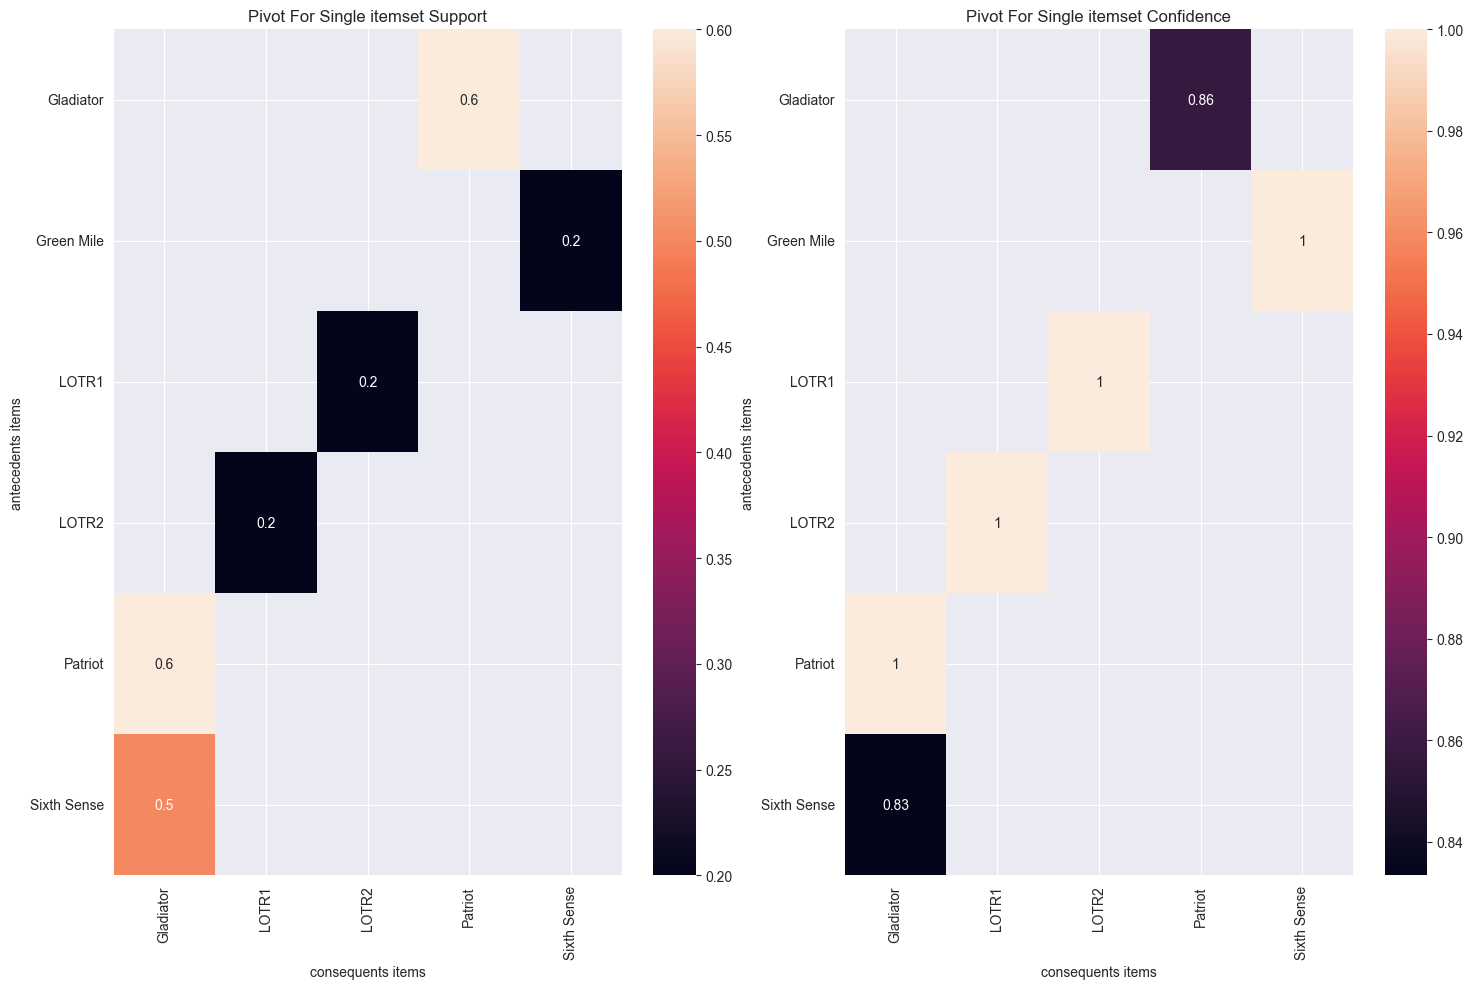

In [14]:
# Visualize these pivots
plt.subplot(1,2,1)
sns.heatmap(pvt_1_spt,annot=True)
plt.title('Pivot For Single itemset Support')
plt.yticks(rotation=0)
plt.xticks(rotation=90)
plt.tight_layout()
plt.subplot(1,2,2)
sns.heatmap(pvt_1_cnf,annot=True)
plt.title('Pivot For Single itemset Confidence')
plt.yticks(rotation=0)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [15]:
# pivot for item set > 1
pvt_spt = asc_rules[asc_rules['x items'] > 1].pivot(index='antecedents items',
                                                columns='consequents items',
                                                values='support')
# for confidence
pvt_cnf = asc_rules[asc_rules['x items'] > 1].pivot(index='antecedents items',
                                                columns='consequents items',
                                                values='confidence')

C:\Users\sagar\AppData\Local\Temp\ipykernel_19144\2741190876.py:13: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


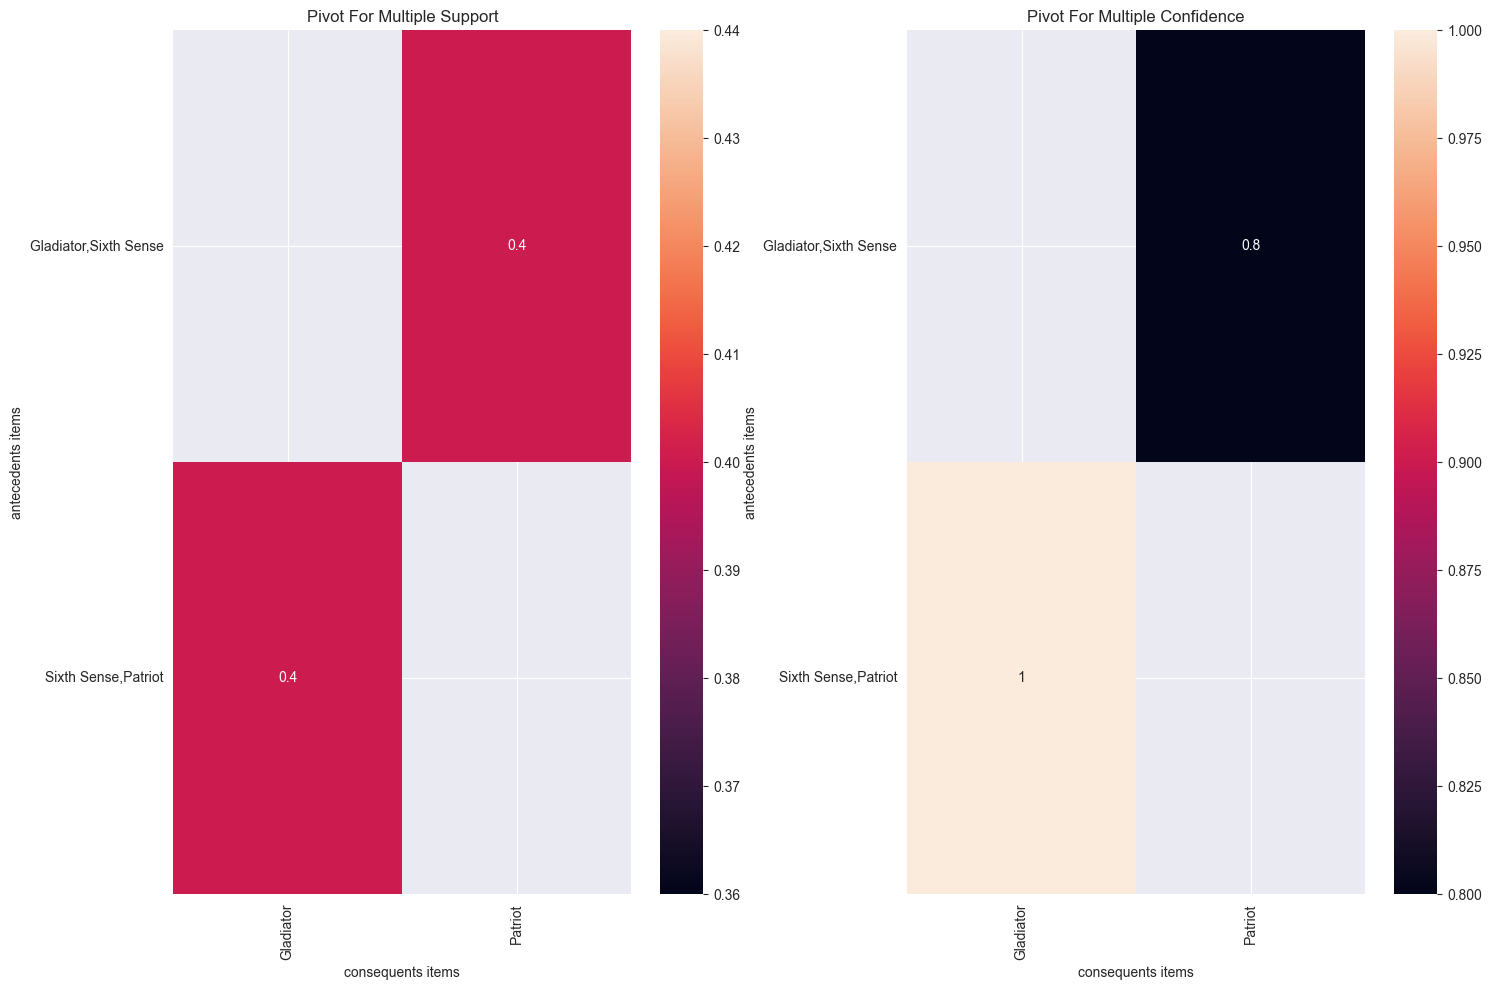

In [16]:
# Visualize these pivots
plt.subplot(1,2,1)
sns.heatmap(pvt_spt,annot=True)
plt.title('Pivot For Multiple Support')
plt.yticks(rotation=0)
plt.xticks(rotation=90)
plt.tight_layout()
plt.subplot(1,2,2)
sns.heatmap(pvt_cnf,annot=True)
plt.title('Pivot For Multiple Confidence')
plt.yticks(rotation=0)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


In [17]:
def plot_pivot(x,title):
    '''Plots pivot table as heatmap'''
    sns.heatmap(x,annot=True)
    plt.title(title)
    plt.yticks(rotation=0)
    plt.xticks(rotation=90)
    plt.tight_layout()

# Trying different threshold values for support and confidence

In [18]:
frq_itms = apriori(movies.astype(bool),min_support=0.1,use_colnames=True)
frq_itms

,support,itemsets
0,0.6,(Sixth Sense)
1,0.7,(Gladiator)
2,0.2,(LOTR1)
3,0.2,(Harry Potter1)
4,0.6,(Patriot)
5,0.2,(LOTR2)
6,0.1,(Harry Potter2)
7,0.1,(LOTR)
8,0.1,(Braveheart)
9,0.2,(Green Mile)


In [19]:
frq_itms.sort_values('support',ascending=False)

,support,itemsets
1,0.7,(Gladiator)
0,0.6,(Sixth Sense)
4,0.6,(Patriot)
17,0.6,"(Gladiator, Patriot)"
10,0.5,"(Gladiator, Sixth Sense)"
30,0.4,"(Gladiator, Sixth Sense, Patriot)"
13,0.4,"(Sixth Sense, Patriot)"
9,0.2,(Green Mile)
22,0.2,"(LOTR2, LOTR1)"
16,0.2,"(Sixth Sense, Green Mile)"


In [20]:
# create association rule using confidence metrics
as_rule = association_rules(frq_itms,
                           metric='confidence',
                           min_threshold=0.8) 
as_rule

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8,0.400000
1,(LOTR),(Sixth Sense),0.1,0.6,0.1,1.000000,1.666667,0.04,inf,0.444444
2,(Green Mile),(Sixth Sense),0.2,0.6,0.2,1.000000,1.666667,0.08,inf,0.500000
3,(Gladiator),(Patriot),0.7,0.6,0.6,0.857143,1.428571,0.18,2.8,1.000000
4,(Patriot),(Gladiator),0.6,0.7,0.6,1.000000,1.428571,0.18,inf,0.750000
...,...,...,...,...,...,...,...,...,...,...
123,"(LOTR1, Green Mile)","(LOTR2, Sixth Sense, Harry Potter1)",0.1,0.1,0.1,1.000000,10.000000,0.09,inf,1.000000
124,"(LOTR1, Harry Potter1)","(LOTR2, Sixth Sense, Green Mile)",0.1,0.1,0.1,1.000000,10.000000,0.09,inf,1.000000
125,"(Sixth Sense, LOTR1)","(LOTR2, Green Mile, Harry Potter1)",0.1,0.1,0.1,1.000000,10.000000,0.09,inf,1.000000
126,"(Green Mile, Harry Potter1)","(LOTR2, Sixth Sense, LOTR1)",0.1,0.1,0.1,1.000000,10.000000,0.09,inf,1.000000


In [21]:
as_rule['antecedents items'] = as_rule['antecedents'].apply(get_name)
as_rule['consequents items'] = as_rule['consequents'].apply(get_name)
as_rule['x items'] = as_rule['antecedents'].apply(lambda x: len(x))

In [22]:
as_rule

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric,antecedents items,consequents items,x items
0,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8,0.400000,Sixth Sense,Gladiator,1
1,(LOTR),(Sixth Sense),0.1,0.6,0.1,1.000000,1.666667,0.04,inf,0.444444,LOTR,Sixth Sense,1
2,(Green Mile),(Sixth Sense),0.2,0.6,0.2,1.000000,1.666667,0.08,inf,0.500000,Green Mile,Sixth Sense,1
3,(Gladiator),(Patriot),0.7,0.6,0.6,0.857143,1.428571,0.18,2.8,1.000000,Gladiator,Patriot,1
4,(Patriot),(Gladiator),0.6,0.7,0.6,1.000000,1.428571,0.18,inf,0.750000,Patriot,Gladiator,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
123,"(LOTR1, Green Mile)","(LOTR2, Sixth Sense, Harry Potter1)",0.1,0.1,0.1,1.000000,10.000000,0.09,inf,1.000000,"LOTR1,Green Mile","LOTR2,Sixth Sense,Harry Potter1",2
124,"(LOTR1, Harry Potter1)","(LOTR2, Sixth Sense, Green Mile)",0.1,0.1,0.1,1.000000,10.000000,0.09,inf,1.000000,"LOTR1,Harry Potter1","LOTR2,Sixth Sense,Green Mile",2
125,"(Sixth Sense, LOTR1)","(LOTR2, Green Mile, Harry Potter1)",0.1,0.1,0.1,1.000000,10.000000,0.09,inf,1.000000,"Sixth Sense,LOTR1","LOTR2,Green Mile,Harry Potter1",2
126,"(Green Mile, Harry Potter1)","(LOTR2, Sixth Sense, LOTR1)",0.1,0.1,0.1,1.000000,10.000000,0.09,inf,1.000000,"Green Mile,Harry Potter1","LOTR2,Sixth Sense,LOTR1",2


In [23]:
# Create pivot table for visualization of support & confidence for single-single item
pvt_1_spot = as_rule[as_rule['x items'] == 1].pivot(index='antecedents items',
                                                columns='consequents items',
                                                values='support')
# for confidence
pvt_1_cnof = as_rule[as_rule['x items'] == 1].pivot(index='antecedents items',
                                                columns='consequents items',
                                                values='confidence')

In [25]:
import warnings
warnings.filterwarnings('ignore')

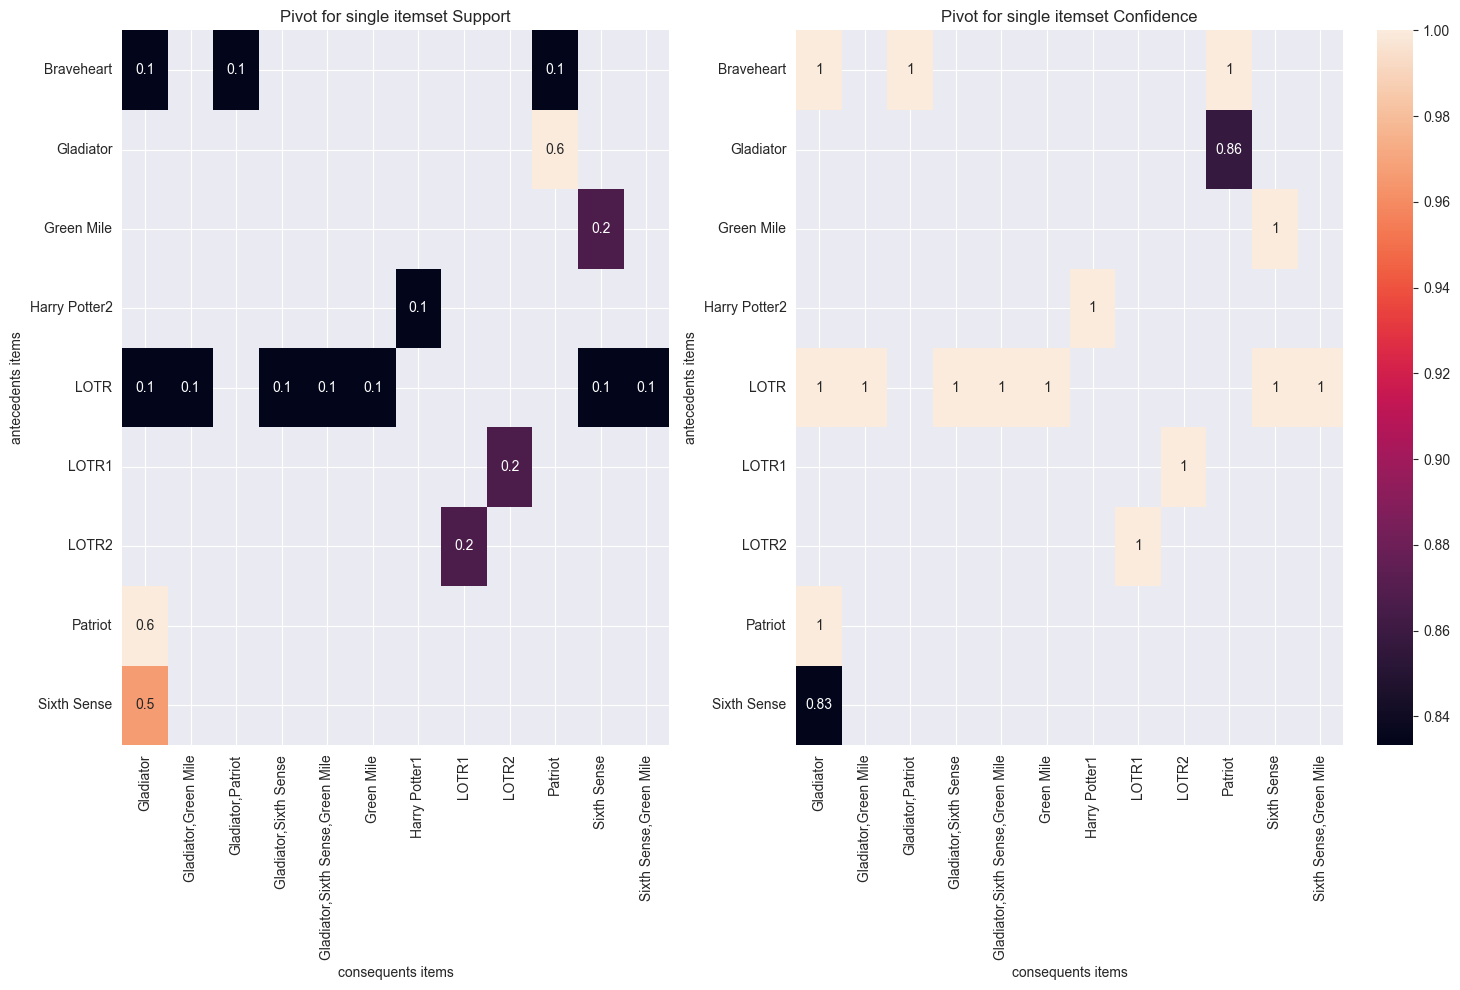

In [26]:
plt.subplot(1,2,1)
plot_pivot(pvt_1_spot,"Pivot for single itemset Support")
plt.tight_layout()
plt.subplot(1,2,2)
plot_pivot(pvt_1_cnof,"Pivot for single itemset Confidence")
plt.tight_layout()
plt.show()

In [27]:
# pivot for item set > 1
pvt_spot = as_rule[as_rule['x items'] > 1].pivot(index='antecedents items',
                                                columns='consequents items',
                                                values='support')
# for confidence
pvt_cnof = as_rule[as_rule['x items'] > 1].pivot(index='antecedents items',
                                                columns='consequents items',
                                                values='confidence')

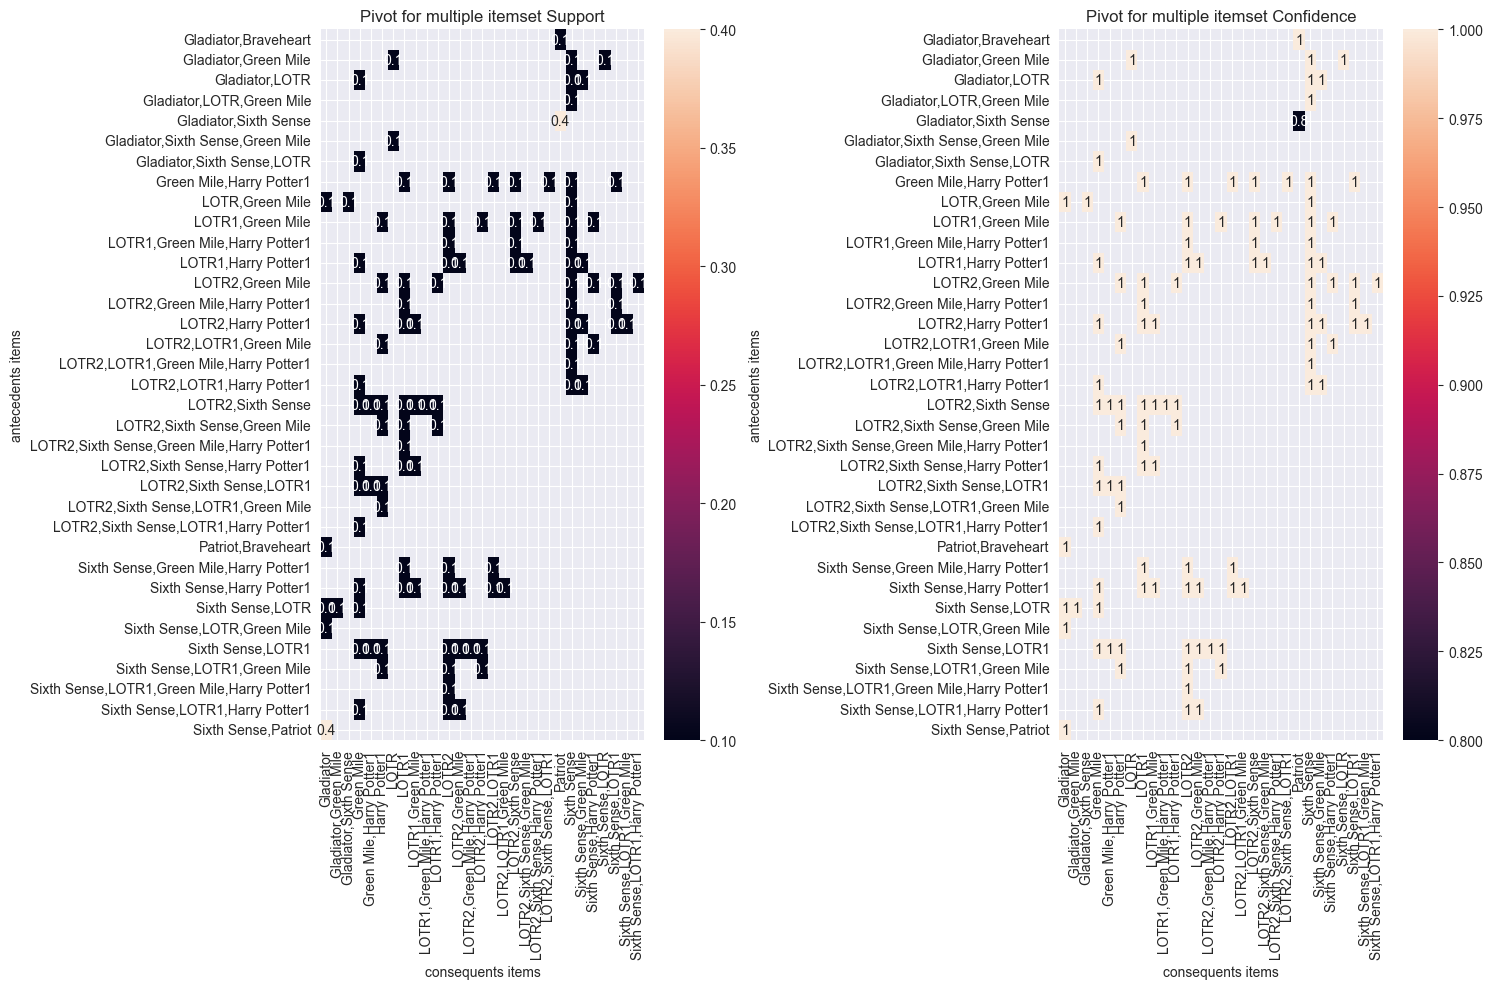

In [28]:
plt.subplot(1,2,1)
plot_pivot(pvt_spot,"Pivot for multiple itemset Support")
plt.tight_layout()
plt.subplot(1,2,2)
plot_pivot(pvt_cnof,"Pivot for multiple itemset Confidence")
plt.tight_layout()
plt.show()

<h2 style="color:blue; font-family: Arial;">Observation:</h2>

_<span style="color:black; font-family: Arial;">Number of item sets increases if we decrease the support threshold, since more itemsets satisfy the threshold limit</span>_

_<span style="color:black; font-family: Arial;">Number of Assotiation rule increases if we decrease the metrics threshold in our case confidence, since more rules satisfy the threshold limit</span>_